In [ ]:
# Домашнє завдання. Частина перша
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
#Вивести перші рядки таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" за допомогою методу head
p1 = pd.read_html(
    io='https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
    match='Коефіцієнт народжуваності в регіонах',
)

In [ ]:
#Визначте кількість рядків та стовпців у датафреймі
table=p1[0]
print(table.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [ ]:
#Визначте кількість рядків та стовпців у датафреймі
print(table.shape)

(28, 9)


In [ ]:
#Замініть у таблиці значення "—" на значення NaN
p =table.replace(to_replace='—',
                value=np.nan,
                inplace=True)
print(table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [ ]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(table.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [ ]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
for index, column in enumerate(table):
    if index != 0 and table[column].dtype == object:
        table[column] = pd.to_numeric(table[column], errors='coerce')

column_types = table.dtypes

print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [71]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values_ratio = table.isnull().sum() / len(table)* 100

print(missing_values_ratio)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [ ]:
table.drop(index=len(p1[0]) - 1, inplace=True)
print(table)



               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [ ]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
p=table.fillna({i: p1[0][i].mean() for i in table if i != 'Регіон'})
print(p)

               Регіон        1950        1960        1970  1990  2000  2012  \
0                Крим  230.000000  206.000000  160.000000   130    73   126   
1           Вінницька  224.000000  192.000000  142.000000   124    84   112   
2           Волинська  247.000000  250.000000  179.000000   153   112   148   
3    Дніпропетровська  204.000000  204.000000  151.000000   123    71   112   
4            Донецька  271.000000  214.000000  140.000000   109    61    98   
5         Житомирська  261.000000  223.000000  159.000000   129    89   122   
6        Закарпатська  314.000000  273.000000  207.000000   168   115   151   
7          Запорізька  219.000000  197.000000  150.000000   124    71   106   
8   Івано-Франківська  243.000000  248.000000  182.000000   155   103   124   
9            Київська  204.000000  189.000000  156.000000   123    73   122   
10     Кіровоградська  216.000000  171.000000  145.000000   126    79   110   
11          Луганська  262.000000  235.000000  144.0

In [ ]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg_br = table['2019'].mean()
print(avg_br)
above_avg_br = table[table['2019'] > avg_br][['Регіон', '2019']]

print(above_avg_br)

80.20833333333333
               Регіон   2019
2           Волинська  101.0
6        Закарпатська  104.0
8   Івано-Франківська   88.0
12          Львівська   87.0
14            Одеська   88.0
16         Рівненська  107.0
20         Херсонська   81.0
23        Чернівецька   92.0
25               Київ  110.0
27            Україна   81.0


In [ ]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_br = table['2014'].max()
print(max_br)
eq_avg_br =table[table['2014'] == max_br][['Регіон', '2014']]
print(eq_avg_br)

148.0
        Регіон   2014
16  Рівненська  148.0


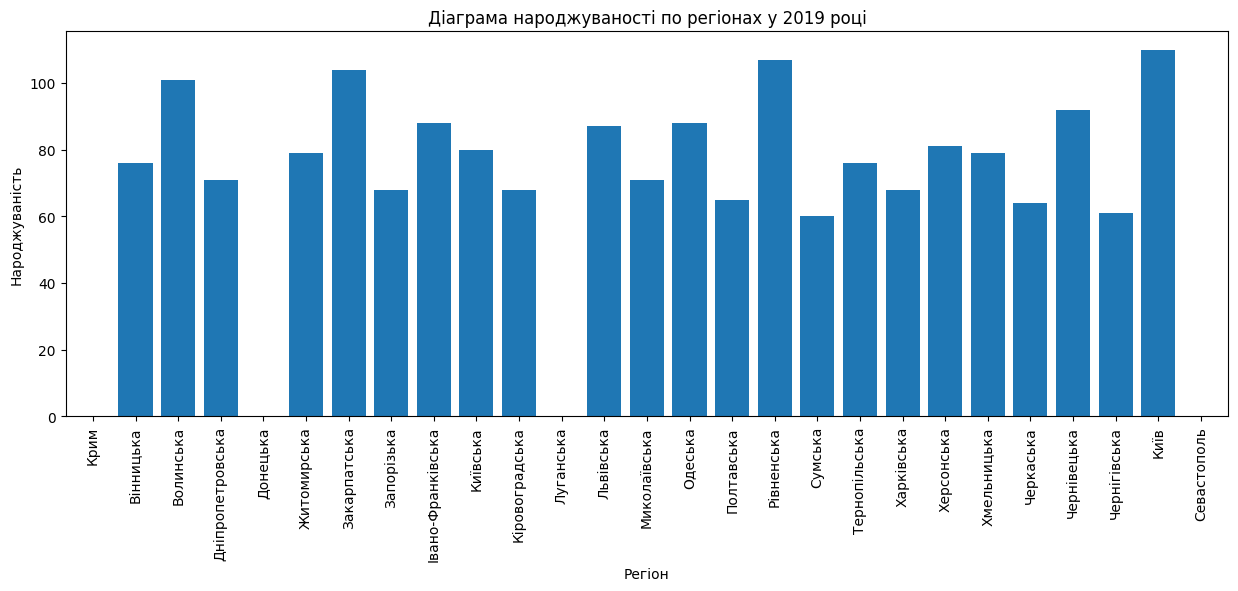

In [ ]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
plt.figure(figsize=(15, 5))
plt.bar(table['Регіон'], table['2019'])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.title('Діаграма народжуваності по регіонах у 2019 році')
plt.xticks(rotation=90)
plt.show()

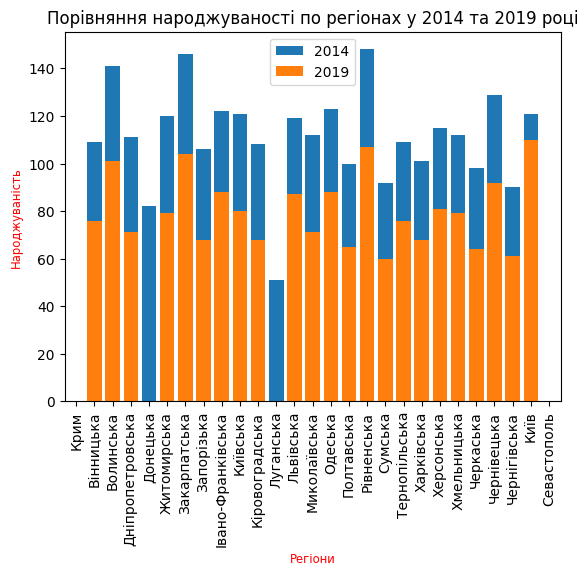

In [ ]:
y1 = table['2019']
y2 = table['2014']
x = table['Регіон']
plt.bar(x, y2, label="2014")
plt.bar(x, y1, label="2019")
plt.xlabel('Регіони', fontsize='small', color='red')
plt.ylabel('Народжуваність', fontsize='small', color='red')
plt.title('Порівняння народжуваності по регіонах у 2014 та 2019 році')
plt.xticks(rotation=90)
plt.legend()
plt.show()

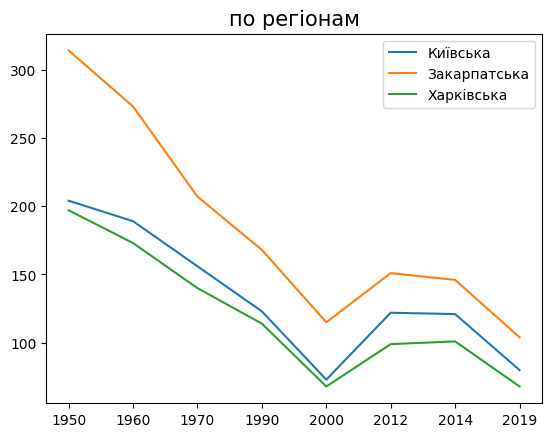

In [ ]:
x = table.columns.tolist()[1:]
y1 = table.loc[9].tolist()[1:]
y2 = table.loc[6].tolist()[1:]
y3 = table.loc[19].tolist()[1:]
fig, axs = plt.subplots()
axs.plot(x, y1, label='Київська')
axs.plot(x, y2, label='Закарпатська')
axs.plot(x, y3, label='Харківська')
plt.title('по регіонам', fontsize=15)
plt.legend()
plt.show()

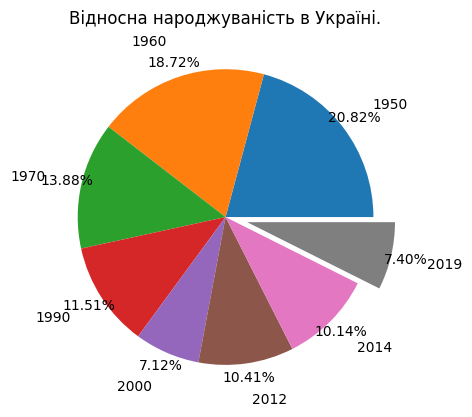

In [ ]:
labels = np.array(table.columns)[1:]
data = np.array(table[table['Регіон'] == 'Україна'].iloc[0][1:])
explode = [0 for _ in table[table['Регіон'] == 'Україна']][:-2] + [0.15]
plt.pie(
    data,
    labels=labels,
    shadow=False,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.10,
    labeldistance=1.25,
)

plt.title('Відносна народжуваність в Україні.', fontsize=12)
plt.show()

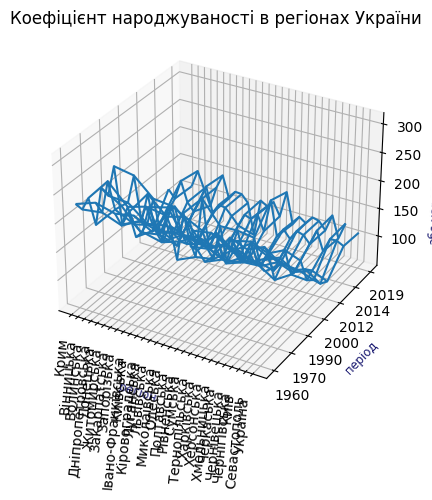

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xl = np.array(table['Регіон'])
yl = np.array(table.columns)[1:]
plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('період', fontsize='small', color='midnightblue')
ax.set_zlabel('абс.народжуваність', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=12)

x, y = np.meshgrid(
    np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

ax.plot_wireframe(
                  x,
                  y,
                  table.to_numpy()[x, y],
                  )

plt.show()